In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.1-py3-none-any.whl size=21133 sha256=765408f1eda55dd65c48853777bf0e1d5e738a55f65470275040e453c229b5e1
  Stored in directory: /root/.cache/pip/wheels/9b/d9/5f/36a39fd10d15b5b2d362ad6dc8a1bd28a3b1e14e08357944bf
Successfully built multiurl
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Define the content of the configuration file
config_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 309401:e69fa1e0-e15f-42c5-9199-e2b8416c64a4
"""

# Define the file path
file_path = '/root/.cdsapirc'

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(config_content)

print("Configuration file created and saved successfully.")


Configuration file created and saved successfully.


In [14]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '2m_temperature', 'cloud_base_height', 'high_cloud_cover',
            'low_cloud_cover', 'mean_sea_level_pressure', 'medium_cloud_cover',
            'surface_latent_heat_flux', 'surface_pressure', 'surface_sensible_heat_flux',
            'total_cloud_cover', 'total_column_cloud_ice_water', 'total_column_cloud_liquid_water',
            'total_precipitation',
        ],
        'year': '2013',
        'month': '06',
        'day': [
            '15', '16', '17',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            31.4, 77.2, 28.8,
            81.2,
        ],
    },
    'download.nc')

2024-05-16 11:31:00,216 INFO Welcome to the CDS
2024-05-16 11:31:00,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-16 11:31:00,478 INFO Request is queued
2024-05-16 11:31:01,725 INFO Request is running
2024-05-16 11:31:51,759 INFO Request is completed
2024-05-16 11:31:51,761 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1715859102.2838843-24687-12-1af90bbc-baed-48ed-b037-270163e0bfec.nc to download.nc (346.4K)
2024-05-16 11:31:54,142 INFO Download rate 145.6K/s


Result(content_length=354752,content_type=application/x-netcdf,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1715859102.2838843-24687-12-1af90bbc-baed-48ed-b037-270163e0bfec.nc)

In [15]:
!ls

download.nc


In [16]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00:00:01


<xarray.Dataset> Size: 1MB
Dimensions:    (longitude: 17, latitude: 11, time: 72)
Coordinates:
  * longitude  (longitude) float32 68B 77.2 77.45 77.7 77.95 ... 80.7 80.95 81.2
  * latitude   (latitude) float32 44B 31.3 31.05 30.8 30.55 ... 29.3 29.05 28.8
  * time       (time) datetime64[ns] 576B 2013-06-15 ... 2013-06-17T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float64 108kB ...
    cbh        (time, latitude, longitude) float64 108kB ...
    hcc        (time, latitude, longitude) float64 108kB ...
    lcc        (time, latitude, longitude) float64 108kB ...
    msl        (time, latitude, longitude) float64 108kB ...
    mcc        (time, latitude, longitude) float64 108kB ...
    ...         ...
    sp         (time, latitude, longitude) float64 108kB ...
    sshf       (time, latitude, longitude) float64 108kB ...
    tcc        (time, latitude, longitude) float64 108kB ...
    tciw       (time, latitude, longitude) float64 108kB ...
    tclw     

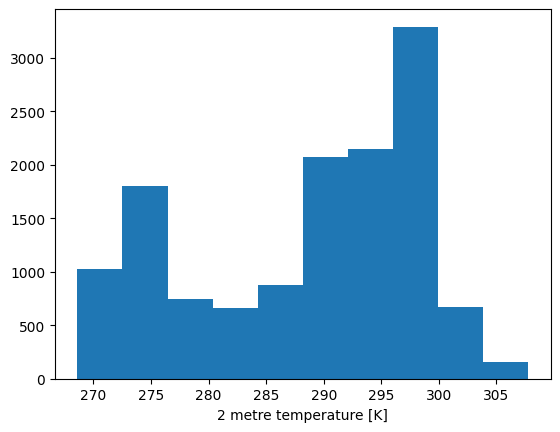

In [17]:
import xarray as xr

# Open the NetCDF file
nc_file = 'download.nc'
dataset = xr.open_dataset(nc_file)

# Print the dataset metadata
print(dataset)

# Access a specific variable (e.g., 't2m' for 2m temperature)
t2m = dataset['t2m']
print(t2m)

# Plot the data (optional, if the variable is plottable)
t2m.plot()

# Close the dataset
dataset.close()